In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Create Latitude and Longitude Combinations

In [2]:
# Add code that generates the latitudes and longitudes, but first, they need to be stored so that we can 
# access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.

# To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) 
# and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# When we run this cell, the output is a zip object in memory. 
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 

# If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
# where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

### Unpack a zip object into a list:

In [3]:
# Let's unpack our lat_lngs zip object into a list. 
# This way, we only need to create a set of random latitudes and longitudes once

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# NOTE: You can only unzip a zipped tuple once before it is removed from the computer's memory.

In [4]:
# Now that we have our ordered pairs of latitudes and longitudes in a list, we can iterate through the 
# list of tuples and find the nearest city to those coordinates.

In [5]:
# Import citipy
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

619

In [7]:
# Psuedocode to map out, at a high level, how we will get the weather data for each city for the website.

    # Import our dependencies and initialize counters and an empty list that will hold the weather data.

    # Loop through the cities list.

    # Group the cities in sets of 50 to log the process as we find the weather data for each city.
    
        # Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.

    # Build the city_url or endpoint for each city.

    # Log the URL and the record and set numbers.

    # Make an API request for each city.
    
    # Parse the JSON weather data for the following:
        # City, country, and date
        # Latitude and longitude
        # Maximum temperature
        # Humidity
        # Cloudiness
        # Wind speed

    #Add the data to a list in a dictionary format and then convert the list to a DataFrame.


### Import Dependencies, and Initialize an Empty List and Counters:

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Create an empty list to hold the weather data.
city_data = []


# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | wilmington
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | luau
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | bhum
Processing Record 8 of Set 1 | acari
Processing Record 9 of Set 1 | ruidoso
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | dickinson
Processing Record 13 of Set 1 | gao
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | tuatapere
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 22 of Set 1 | mataura
Proce

Processing Record 40 of Set 4 | leningradskiy
Processing Record 41 of Set 4 | acapulco
Processing Record 42 of Set 4 | saint george
Processing Record 43 of Set 4 | praia
Processing Record 44 of Set 4 | opuwo
Processing Record 45 of Set 4 | visby
Processing Record 46 of Set 4 | maarianhamina
Processing Record 47 of Set 4 | vila velha
Processing Record 48 of Set 4 | tiksi
Processing Record 49 of Set 4 | cabedelo
Processing Record 50 of Set 4 | naze
Processing Record 1 of Set 5 | novyy urgal
Processing Record 2 of Set 5 | severo-kurilsk
Processing Record 3 of Set 5 | riyadh
Processing Record 4 of Set 5 | nouadhibou
Processing Record 5 of Set 5 | paciran
Processing Record 6 of Set 5 | shangrao
Processing Record 7 of Set 5 | butaritari
Processing Record 8 of Set 5 | kondinskoye
Processing Record 9 of Set 5 | vanimo
Processing Record 10 of Set 5 | kholodnyy
Processing Record 11 of Set 5 | fortuna
Processing Record 12 of Set 5 | khatanga
Processing Record 13 of Set 5 | katsuura
Processing Rec

Processing Record 30 of Set 8 | tidore
City not found. Skipping...
Processing Record 31 of Set 8 | saint-georges
Processing Record 32 of Set 8 | mende
Processing Record 33 of Set 8 | saucillo
Processing Record 34 of Set 8 | kidodi
Processing Record 35 of Set 8 | campina verde
Processing Record 36 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 37 of Set 8 | sangar
Processing Record 38 of Set 8 | garissa
Processing Record 39 of Set 8 | mitu
Processing Record 40 of Set 8 | ilhabela
Processing Record 41 of Set 8 | keroka
Processing Record 42 of Set 8 | burica
City not found. Skipping...
Processing Record 43 of Set 8 | broken hill
Processing Record 44 of Set 8 | afmadu
City not found. Skipping...
Processing Record 45 of Set 8 | raigarh
Processing Record 46 of Set 8 | pacific grove
Processing Record 47 of Set 8 | quatre cocos
Processing Record 48 of Set 8 | fort nelson
Processing Record 49 of Set 8 | semey
Processing Record 50 of Set 8 | mawlaik
Processing Record 1 of

Processing Record 14 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 15 of Set 12 | iwanai
Processing Record 16 of Set 12 | gombe
Processing Record 17 of Set 12 | makaryev
Processing Record 18 of Set 12 | sapao
City not found. Skipping...
Processing Record 19 of Set 12 | tucuman
Processing Record 20 of Set 12 | husavik
Processing Record 21 of Set 12 | romhany
Processing Record 22 of Set 12 | akyab
Processing Record 23 of Set 12 | mount barker
Processing Record 24 of Set 12 | okandja
City not found. Skipping...
Processing Record 25 of Set 12 | rabo de peixe
Processing Record 26 of Set 12 | endicott
Processing Record 27 of Set 12 | sabha
Processing Record 28 of Set 12 | tura
Processing Record 29 of Set 12 | cedeno
Processing Record 30 of Set 12 | south river
Processing Record 31 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 32 of Set 12 | kirakira
Processing Record 33 of Set 12 | lufilufi
Processing Record 34 of Set 12 | tahoua
Processing Reco

In [11]:
len(city_data)

569

### Create a DataFrame of City Weather Data:

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,50.90,74,64,2.55,AU,2021-11-29 18:49:50
1,Wilmington,34.2257,-77.9447,52.99,39,7,4.00,US,2021-11-29 18:55:18
2,Port Elizabeth,-33.9180,25.5701,63.10,88,0,6.91,ZA,2021-11-29 18:50:47
3,Luau,-10.7073,22.2247,65.93,96,45,3.42,AO,2021-11-29 18:56:18
4,Atuona,-9.8000,-139.0333,78.21,78,33,23.24,PF,2021-11-29 18:51:46
5,Upernavik,72.7868,-56.1549,21.33,96,100,6.24,GL,2021-11-29 18:51:56
6,Bhum,18.4667,75.6667,70.84,57,100,10.31,IN,2021-11-29 18:56:20
7,Acari,-15.4311,-74.6158,78.37,52,20,11.39,PE,2021-11-29 18:56:20
8,Ruidoso,33.3317,-105.6730,65.89,20,1,8.05,US,2021-11-29 18:56:21
9,Cabo San Lucas,22.8909,-109.9124,85.17,65,100,4.00,MX,2021-11-29 18:56:21


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2021-11-29 18:49:50,-42.7826,147.0587,50.90,74,64,2.55
1,Wilmington,US,2021-11-29 18:55:18,34.2257,-77.9447,52.99,39,7,4.00
2,Port Elizabeth,ZA,2021-11-29 18:50:47,-33.9180,25.5701,63.10,88,0,6.91
3,Luau,AO,2021-11-29 18:56:18,-10.7073,22.2247,65.93,96,45,3.42
4,Atuona,PF,2021-11-29 18:51:46,-9.8000,-139.0333,78.21,78,33,23.24


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Get Data for Plotting

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/29/21'

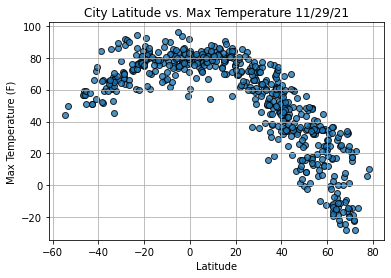

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

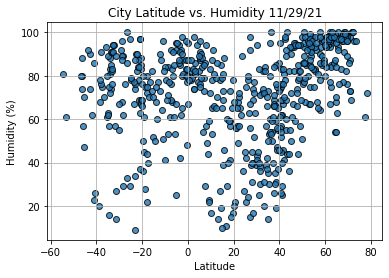

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

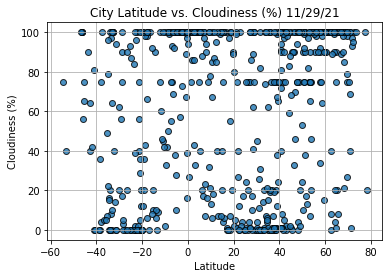

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

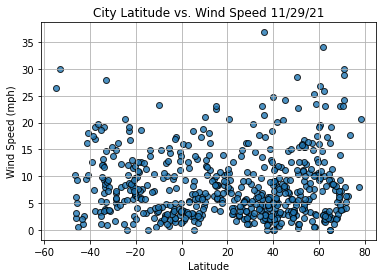

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()